In [32]:
import time
from datetime import datetime
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn import (model_selection, ensemble, decomposition, 
                     svm, feature_selection, metrics)
from matplotlib import pyplot as plt
import scikitplot as skplt # 绘画roc曲线

In [2]:
file_path = '/Users/JQC/Desktop/Santander/train.csv'
data = pd.read_csv(file_path)
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:
data.shape

(200000, 202)

In [4]:
data[data['target'] == 0].shape[0] / data[data['target'] == 1].shape[0]

8.951238929246692

In [5]:
X = data.iloc[:, 2:]
y = data['target']

In [6]:
# 先使用随机森林进行 看看大致效果 并查看各个特征对模型的贡献度
start = time.time()

clf = ensemble.RandomForestClassifier(n_estimators=30,
                                      n_jobs=6,
                                      random_state=66,
                                     ).fit(X, y)
print(clf.score(X, y))
datetime.fromtimestamp(time.time() - start).strftime("%M:%S")

0.997915


'02:08'

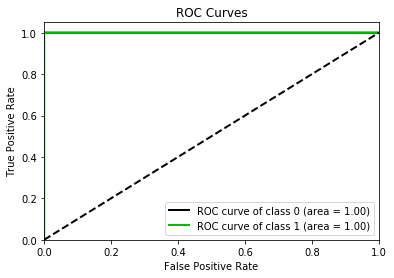

In [7]:
skplt.metrics.plot_roc(y,
                        clf.predict_proba(X),
                        plot_micro=False,
                        plot_macro=False,
                      )

In [8]:
# 查看每个特征对模型的贡献度
print(clf.feature_importances_.shape)
df = pd.DataFrame(clf.feature_importances_)
df['columns'] = data.columns[2:]
df = df.sort_values(by=[0], ascending=False)
df['cumsum'] = df[0].cumsum()
df.index = range(df.shape[0])
# 由下面的数据可以看出,特征维度对模型的贡献度很均匀 
df

(200,)


,0,columns,cumsum
0,0.012463,var_81,0.012463
1,0.009743,var_139,0.022206
2,0.009381,var_12,0.031587
3,0.008850,var_53,0.040436
4,0.008744,var_26,0.049181
5,0.008428,var_110,0.057609
6,0.008386,var_166,0.065995
7,0.007877,var_146,0.073871
8,0.007686,var_109,0.081557
9,0.007667,var_22,0.089224


In [9]:
X_fvar = feature_selection.VarianceThreshold(0.01).fit_transform(X)
X_fvar.shape

(200000, 199)

In [10]:
X_fvar

array([[  8.9255,  -6.7863,  11.9081, ...,   8.5635,  12.7803,  -1.0914],
       [ 11.5006,  -4.1473,  13.8588, ...,   8.7889,  18.356 ,   1.9518],
       [  8.6093,  -2.7457,  12.0805, ...,   8.2675,  14.7222,   0.3965],
       ...,
       [ 11.2232,  -5.0518,  10.5127, ...,   8.7155,  13.8329,   4.1995],
       [  9.7148,  -8.6098,  13.6104, ...,  10.0342,  15.5289, -13.9001],
       [ 10.8762,  -5.7105,  12.1183, ...,   8.1857,  12.1284,   0.1385]])

In [11]:
# 再次使用互信息法进行相关性过滤 过滤掉互信息量小于0的特征
result = feature_selection.mutual_info_classif(X_fvar, y)
start = time.time()

k = result[result>0].shape[0]
print('k=', k)
x_fmic = feature_selection.SelectKBest(feature_selection.mutual_info_classif, k).fit_transform(X_fvar, y)
# 
rfc = ensemble.RandomForestClassifier(n_estimators=10, random_state=66, n_jobs=3)
print(model_selection.cross_val_score(rfc, x_fmic, y, cv=5).mean())

datetime.fromtimestamp(time.time() - start).strftime("%M:%S")

k= 144
0.8996850018248843


'11:51'

In [12]:
x_fmic.shape

(200000, 144)

In [13]:
type(x_fmic)
x_fmic 

array([[  8.9255,  -6.7863,  11.9081, ...,   8.5635,  12.7803,  -1.0914],
       [ 11.5006,  -4.1473,  13.8588, ...,   8.7889,  18.356 ,   1.9518],
       [  8.6093,  -2.7457,  12.0805, ...,   8.2675,  14.7222,   0.3965],
       ...,
       [ 11.2232,  -5.0518,  10.5127, ...,   8.7155,  13.8329,   4.1995],
       [  9.7148,  -8.6098,  13.6104, ...,  10.0342,  15.5289, -13.9001],
       [ 10.8762,  -5.7105,  12.1183, ...,   8.1857,  12.1284,   0.1385]])

In [14]:
# 下面划分测试机和训练集
X_ = pd.DataFrame(x_fmic)
X_train,X_test, y_train, y_test = model_selection.train_test_split(X_, y,test_size=0.3, random_state=0)
# 恢复索引
for i in [X_train,X_test, y_train, y_test]:
    i.index = range(i.shape[0])

In [42]:
# 先使用随机森林进行 看看大致效果 并查看各个特征对模型的贡献度
start = time.time()

clf = ensemble.RandomForestClassifier(n_estimators=100,
                                      n_jobs=6,
                                      random_state=66,
                                     ).fit(X_train, y_train)
print(clf.score(X_test, y_test))
datetime.fromtimestamp(time.time() - start).strftime("%M:%S")

0.8981


'03:17'

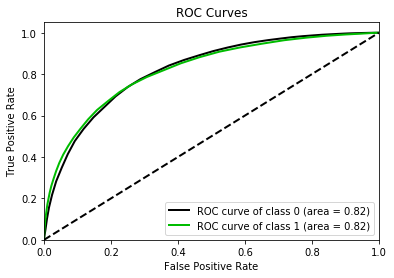

In [44]:
skplt.metrics.plot_roc(y_test,
                        clf.predict_proba(X_test),
                        plot_micro=False,
                        plot_macro=False,
#                         classes_to_plot=None,
#                         ax=None,
#                         figsize=None,
#                         cmap='nipy_spectral',
#                         title_fontsize='large',
#                         text_fontsize='medium',
                      )

In [46]:
# 调参
# 使用n_estimators 绘画学习曲线  挑选出最优的n_estimators
train_score = []
test_score = []
for i in range(10, 600, 30):
    clf = ensemble.RandomForestClassifier(n_estimators=i, 
                                          n_jobs=4,
                                          random_state=66,
                                         ).fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))

In [71]:
train_score = []
test_score = []
for i in range(15, 90, 3):
    clf = ensemble.RandomForestClassifier(n_estimators=i, 
                                          n_jobs=4,
                                          random_state=66,
                                         ).fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))
    

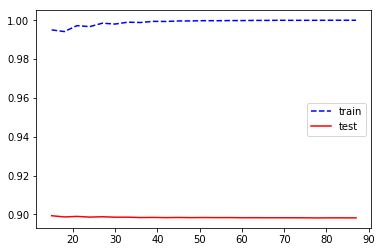

In [72]:
plt.figure()
plt.plot(range(15, 90, 3), train_score, 'b--', label='train')
plt.plot(range(15, 90, 3), test_score, 'r-', label='test')
plt.legend()
plt.show()

In [79]:
test_max = np.max(train_score)
test_index = train_score.index(test_max)
n_estimators = [*range(15, 90, 3)][test_index]
print(test_max)
print(test_index)
print(n_estimators)

0.9997928571428571
14
57


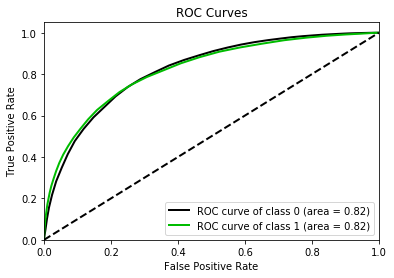

In [88]:
# 接下来看一下 auc面积
clf = ensemble.RandomForestClassifier(n_estimators=100, 
                                      n_jobs=4,
                                      random_state=66,
                                     ).fit(X_train, y_train)
skplt.metrics.plot_roc(y_test,
                        clf.predict_proba(X_test),
                        plot_micro=False,
                        plot_macro=False,
                      )

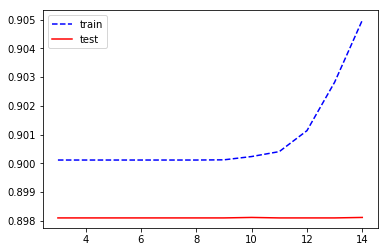

In [92]:
# 这个可以不做 只有出现过拟合时才进行裁剪树  我只是看一下这个最大深度对模型的影响
# 从下图可以看出 基本上当深度为3时都已经基本不变化 所以去深度为3
train_score = []
test_score = []
for i in range(3, 15, 1):
    clf = ensemble.RandomForestClassifier(n_estimators=57, 
                                          n_jobs=4,
                                          max_depth=i,
                                          random_state=66,
                                         ).fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))
plt.figure()
plt.plot(range(3, 15, 1), train_score, 'b--', label='train')
plt.plot(range(3, 15, 1), test_score, 'r-', label='test')
plt.legend()
plt.show()

In [94]:
train_max = np.max(train_score)
train_index = train_score.index(train_max)
print(train_max)
print([*range(3, 15, 1)][train_index])

0.9049785714285714
14


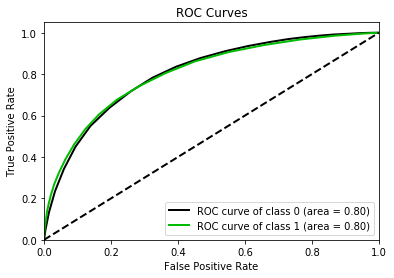

In [96]:
# 接下来看一下 auc面积
clf = ensemble.RandomForestClassifier(n_estimators=57, 
                                      n_jobs=9,
#                                       max_depth=3,
                                      random_state=66,
                                     ).fit(X_train, y_train)
skplt.metrics.plot_roc(y_test,
                        clf.predict_proba(X_test),
                        plot_micro=False,
                        plot_macro=False,
                      )

In [49]:
# 通过调节class_weight 使样本尽可能多捕捉少数类 来提升准确率
i_range = np.linspace(1, 10, 20)
for i in i_range:
    start = time.time()
    clf = ensemble.RandomForestClassifier(n_estimators=57, 
                                      n_jobs=9,
                                      random_state=66,
#                                           class_weight='balanced',
#                                           class_weight={0: 1, 1: 50},
                                          class_weight={1:i}, # 注意，这里写的其实是 类别1权重：10， 类别0的权重：1这个比例

                                     ).fit(X_, y)
    score = clf.score(X_, y)
    y_pred = clf.predict(X_)
    # 召回率 召回率越大，尽可能的捕捉少数类
    recall = metrics.recall_score(y, y_pred)
    auc = metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" %(i, score,recall, auc))
    print(datetime.fromtimestamp(time.time() - start).strftime("%M:%S:%f"))
    

under ratio 1:1.000000 testing accuracy 0.999865, recall is 0.998657', auc is 1.000000
03:15:300742
under ratio 1:1.473684 testing accuracy 0.999840, recall is 0.998408', auc is 1.000000
02:53:487428
under ratio 1:1.947368 testing accuracy 0.999820, recall is 0.998209', auc is 1.000000
02:39:056407
under ratio 1:2.421053 testing accuracy 0.999830, recall is 0.998308', auc is 1.000000
02:27:718477
under ratio 1:2.894737 testing accuracy 0.999835, recall is 0.998358', auc is 1.000000
02:19:221560
under ratio 1:3.368421 testing accuracy 0.999820, recall is 0.998209', auc is 1.000000
02:12:790460
under ratio 1:3.842105 testing accuracy 0.999790, recall is 0.997910', auc is 1.000000
02:09:112532
under ratio 1:4.315789 testing accuracy 0.999835, recall is 0.998358', auc is 1.000000
02:04:272706
under ratio 1:4.789474 testing accuracy 0.999820, recall is 0.998209', auc is 1.000000
02:01:036022
under ratio 1:5.263158 testing accuracy 0.999850, recall is 0.998507', auc is 1.000000
01:58:727637


In [48]:
start = time.time()
clf = ensemble.RandomForestClassifier(n_estimators=57, 
                                  n_jobs=9,
                                  random_state=66,
                                      class_weight='balanced',
#                                       class_weight={0: 1, 1: 50},
#                                       class_weight={1:10}, # 注意，这里写的其实是 类别1权重：10， 类别0的权重：1这个比例

                                 ).fit(X_, y)
score = clf.score(X_, y)
y_pred = clf.predict(X_)
# 召回率 召回率越大，尽可能的捕捉少数类
recall = metrics.recall_score(y, y_pred)
auc = metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" %(i, score,recall, auc))
print(datetime.fromtimestamp(time.time() - start).strftime("%M:%S:%f"))


under ratio 1:10.000000 testing accuracy 0.999775, recall is 0.997761', auc is 1.000000
01:56:326733


In [39]:
np.sum([clf.predict(X_test) == 1])

0

In [42]:
np.sum([y_test == 1])

6114

In [43]:
np.sum([y_pred == 1])

0